In [2]:
# Step 1: Upload and Extract Dataset
from google.colab import files
import zipfile
import os

# Upload the dataset ZIP file
uploaded = files.upload()

# Extract the uploaded ZIP file
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('/content/')

# Verify the extraction
os.listdir('/content/')

['Training', 'Testing']

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
os.listdir('/content/Dataset/')

['Training', 'Testing']

In [8]:
train_dir = '/content/Dataset/Training'
test_dir = '/content/Dataset/Testing'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

Found 26281 images belonging to 8 classes.
Found 6573 images belonging to 8 classes.


In [11]:
# Step 3: Data Preprocessing
train_dir = '/content/Dataset/Training'
test_dir = '/content/Dataset/Testing'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Resize images to 128x128
target_size = (128, 128)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)


Found 26281 images belonging to 8 classes.
Found 6573 images belonging to 8 classes.


In [12]:
# Step 2: Import Necessary Libraries (Make sure Dropout is imported)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout  # Import Dropout here
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [13]:
# Step 4: Build the MobileNetV2 Model
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the last few layers of the base model
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 [==============================] - 0s 0us/step


In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Number of classes in the FER2013 dataset
num_classes = 7

# Adjust the final layer of the model to have the correct number of output units
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)


ValueError: Input 0 of layer "global_average_pooling2d_2" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 7)

In [15]:
# Set the target size for both train and test generators to match the model's input shape
target_size = (128, 128)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

Found 26281 images belonging to 8 classes.
Found 6573 images belonging to 8 classes.


In [16]:
# Modify the model's output layer to match the number of classes in the dataset
predictions = Dense(8, activation='softmax')(x)

In [17]:
# Print the shapes of the input data and model's output
print("Input data shape:", next(train_generator)[0].shape)
print("Model output shape:", model.output_shape)

Input data shape: (32, 128, 128, 3)
Model output shape: (None, 7)


In [18]:
# Run the model.fit() method with the updated generators and output layer
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-14-804d93a938f4>", line 9, in <cell line: 9>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[32,7] labels_size=[32,8]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_22371]

In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Number of classes in the FER2013 dataset
num_classes = 8

# Load MobileNetV2 without the top layers and specify the input shape
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)


Epoch 1/30


KeyboardInterrupt: 

In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Number of classes in the FER2013 dataset
num_classes = 8

# Load MobileNetV2 without the top layers and specify the input shape
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)


Epoch 1/20
 71/822 [=>............................] - ETA: 2:08 - loss: 2.0748 - accuracy: 0.2029

KeyboardInterrupt: 

In [24]:
os.listdir('/content/Dataset/Training/fear')

['img_20261.png',
 'img_4149.png',
 'img_22845.png',
 'img_10771.png',
 'img_23888.png',
 'img_29175.png',
 'img_18510.png',
 'img_17559.png',
 'img_13438.png',
 'img_13863.png',
 'img_4746.png',
 'img_19750.png',
 'img_4135.png',
 'img_14476.png',
 'AM07AFS.png',
 'img_21705.png',
 'img_25158.png',
 'img_12429.png',
 'img_22189.png',
 'img_3438.png',
 'img_30925.png',
 'img_18773.png',
 'img_30459.png',
 'img_28832.png',
 'img_5928.png',
 'img_4471.png',
 'img_1342.png',
 'img_15811.png',
 'img_30729.png',
 'img_21137.png',
 'img_29513.png',
 'img_23418.png',
 'img_4650.png',
 'img_2624.png',
 'img_12743.png',
 'img_24414.png',
 'img_3472.png',
 'img_7786.png',
 'img_12433.png',
 'img_31004.png',
 'img_25388.png',
 'img_3746.png',
 'img_8812.png',
 'img_32059.png',
 'img_2356.png',
 'img_27430.png',
 'img_31920.png',
 'img_25327.png',
 'img_16574.png',
 'img_31142.png',
 'img_21.png',
 'img_4473.png',
 'img_365.png',
 'img_24243.png',
 'img_22265.png',
 'img_11471.png',
 'img_22215.pn

In [25]:
# Set the target size for both train and test generators to match the model's input shape
target_size = (128, 128)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

Found 26281 images belonging to 8 classes.
Found 6573 images belonging to 8 classes.


In [26]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Number of classes in the FER2013 dataset
num_classes = 8

# Load MobileNetV2 without the top layers and specify the input shape
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)


Epoch 1/30
822/822 [==============================] - ETA: 0s - loss: 1.6952 - accuracy: 0.3498

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


822/822 [==============================] - 177s 188ms/step - loss: 1.6952 - accuracy: 0.3498 - val_loss: 4.4761 - val_accuracy: 0.3487 - lr: 0.0010
Epoch 2/30
822/822 [==============================] - 156s 190ms/step - loss: 1.4943 - accuracy: 0.4521 - val_loss: 2.6533 - val_accuracy: 0.2054 - lr: 0.0010
Epoch 3/30
822/822 [==============================] - 150s 183ms/step - loss: 1.3667 - accuracy: 0.5000 - val_loss: 2.4987 - val_accuracy: 0.4196 - lr: 0.0010
Epoch 4/30
822/822 [==============================] - 149s 182ms/step - loss: 1.3116 - accuracy: 0.5262 - val_loss: 1.7003 - val_accuracy: 0.3767 - lr: 0.0010
Epoch 5/30
822/822 [==============================] - 152s 185ms/step - loss: 1.2618 - accuracy: 0.5413 - val_loss: 1.6783 - val_accuracy: 0.4633 - lr: 0.0010
Epoch 6/30
822/822 [==============================] - 151s 183ms/step - loss: 1.2445 - accuracy: 0.5512 - val_loss: 1.5390 - val_accuracy: 0.4540 - lr: 0.0010
Epoch 7/30
822/822 [==============================] - 150

In [31]:
from google.colab import files

# Assuming 'model' is your trained model
model.save('best_model.h5')

# Download the saved model to your local machine
files.download('best_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
model.load_weights('best_model.h5')

loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')

206/206 [==============================] - 7s 36ms/step - loss: 0.7916 - accuracy: 0.7126
Test accuracy: 71.26%


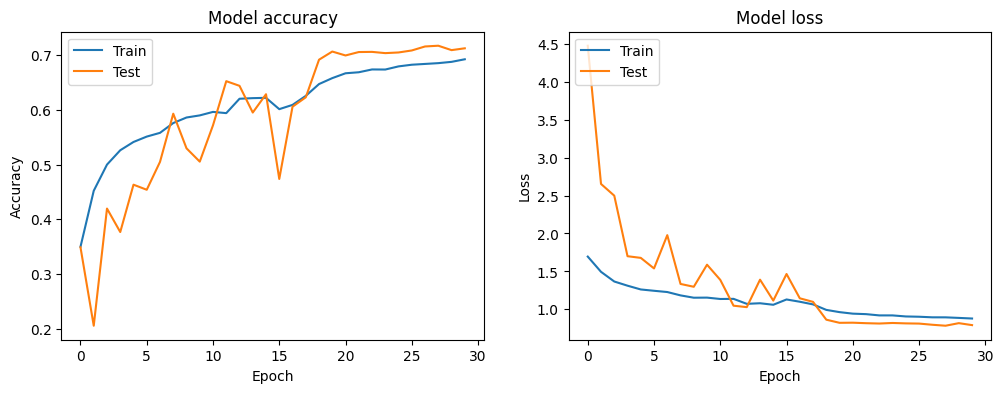

In [33]:
# Step 7: Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Saving depositphotos_223033032-stock-photo-angry-screaming-young-girl-portrait.jpg to depositphotos_223033032-stock-photo-angry-screaming-young-girl-portrait.jpg
1/1 [==============================] - 1s 1s/step


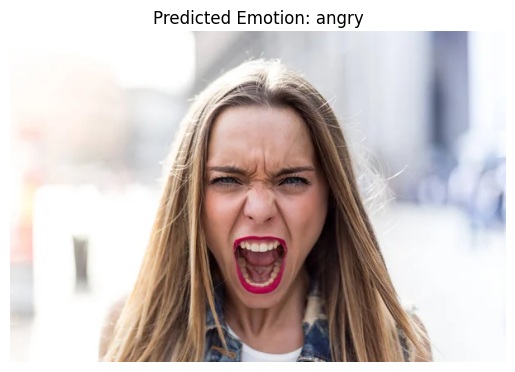

Predicted Emotion: angry


In [36]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('best_model.h5')

# Define emotions for mapping predicted indices
emotions = ['angry', 'disgust', 'fear', 'happy', 'sadness', 'surprise', 'neutral','contempt']

# Function to preprocess image
def preprocess_image(img):
    img = cv2.resize(img, (128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Scale pixel values to [0, 1]
    return img_array

# Function to predict emotion
def predict_emotion(img):
    img = preprocess_image(img)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    return emotions[predicted_class]

# Upload an image file
uploaded = files.upload()

# Process uploaded image and make prediction
for filename in uploaded.keys():
    img_path = '/content/' + filename
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB for display
    predicted_emotion = predict_emotion(img)

    # Display image and predicted emotion
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f'Predicted Emotion: {predicted_emotion}')
    plt.show()

    print(f'Predicted Emotion: {predicted_emotion}')


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# Load the trained model
model = load_model('best_model.h5')

# Define data directories
test_dir = '/content/Dataset/Training'

# Create data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Resize images to 128x128
target_size = (128, 128)

# Generate batches of data from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep data in order to evaluate metrics
)

# Evaluate model on test data to get predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)


Found 26281 images belonging to 8 classes.
822/822 [==============================] - 30s 35ms/step
              precision    recall  f1-score   support

       anger       0.64      0.72      0.68      3780
    contempt       0.00      0.00      0.00       104
     disgust       0.75      0.58      0.65       636
        fear       0.64      0.37      0.47      2763
   happiness       0.90      0.93      0.91      7239
  neutrality       0.62      0.77      0.69      4057
     sadness       0.74      0.62      0.67      4322
    surprise       0.76      0.84      0.79      3380

    accuracy                           0.74     26281
   macro avg       0.63      0.60      0.61     26281
weighted avg       0.74      0.74      0.73     26281



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Found 26281 images belonging to 8 classes.
822/822 [==============================] - 33s 39ms/step


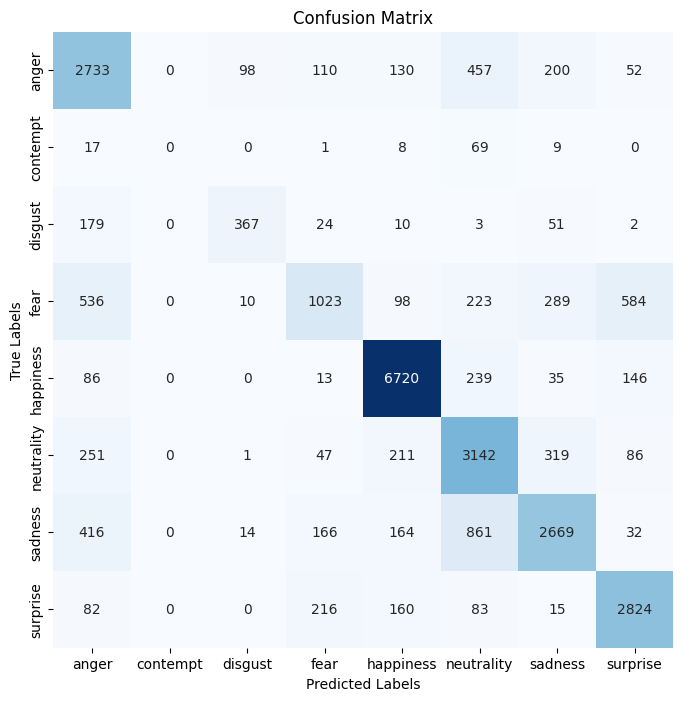

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the trained model
model = load_model('best_model.h5')

# Define data directories
test_dir = '/content/Dataset/Training'

# Create data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Resize images to 128x128
target_size = (128, 128)

# Generate batches of data from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep data in order to evaluate metrics
)

# Evaluate model on test data to get predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



822/822 [==============================] - 32s 37ms/step


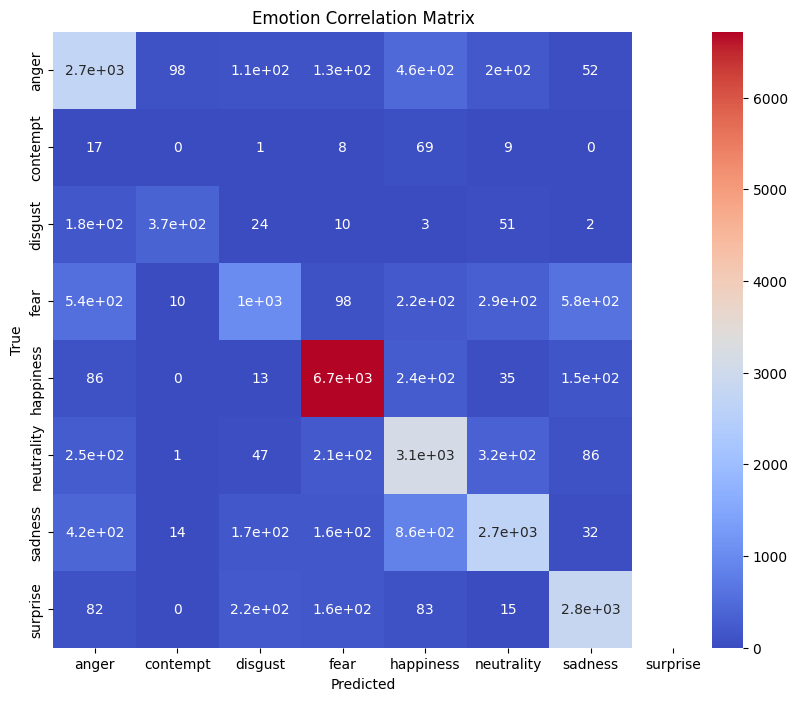

In [49]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already defined `model` and `test_generator`

# Step 1: Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Step 2: Retrieve true labels
y_true = test_generator.classes  # This gives you the true labels

# Step 3: Convert to DataFrames for analysis
emotions = list(test_generator.class_indices.keys())
true_df = pd.DataFrame(y_true, columns=['True_Label'])
pred_df = pd.DataFrame(y_pred_classes, columns=['Predicted_Label'])

# Step 4: Calculate correlation matrix
correlation_matrix = pd.crosstab(true_df['True_Label'], pred_df['Predicted_Label'], rownames=['True'], colnames=['Predicted'])

# Step 5: Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=emotions, yticklabels=emotions)
plt.title('Emotion Correlation Matrix')
plt.show()


In [50]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_5[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[0][0]']      

In [60]:
from sklearn.metrics import classification_report

# Assuming you have already defined `model` and `test_generator`

# Step 1: Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Step 2: Retrieve true labels
y_true = test_generator.classes  # This gives you the true labels

# Step 3: Get class names (emotions)
emotions = list(test_generator.class_indices.keys())

# Step 4: Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=emotions)

# Print the classification report
print(report)


822/822 [==============================] - 30s 34ms/step
              precision    recall  f1-score   support

       anger       0.64      0.72      0.68      3780
    contempt       0.00      0.00      0.00       104
     disgust       0.75      0.58      0.65       636
        fear       0.64      0.37      0.47      2763
   happiness       0.90      0.93      0.91      7239
  neutrality       0.62      0.77      0.69      4057
     sadness       0.74      0.62      0.67      4322
    surprise       0.76      0.84      0.79      3380

    accuracy                           0.74     26281
   macro avg       0.63      0.60      0.61     26281
weighted avg       0.74      0.74      0.73     26281



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.metrics import classification_report

# Assuming you have already defined `model` and `test_generator`

# Step 1: Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Step 2: Retrieve true labels
y_true = test_generator.classes  # This gives you the true labels

# Step 3: Get emotion class names from the generator
emotion_classes = list(test_generator.class_indices.keys())

# Step 4: Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=emotion_classes, output_dict=True)

# Step 5: Print the keys of the report dictionary to inspect
print("Keys in classification report:", list(report.keys()))

# Step 6: Print the full classification report for inspection
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=emotion_classes))

# Step 7: Access metrics for each class
if 'angry' in report:
    angry_metrics = report['angry']
    print("Metrics for 'angry' class:")
    print(f"Precision: {angry_metrics['precision']:.2f}")
    print(f"Recall: {angry_metrics['recall']:.2f}")
    print(f"F1-Score: {angry_metrics['f1-score']:.2f}")
    print(f"Support: {angry_metrics['support']}")
else:
    print("Class 'angry' not found in the report.")

if 'happy' in report:
    happy_metrics = report['happy']
    print("Metrics for 'happy' class:")
    print(f"Precision: {happy_metrics['precision']:.2f}")
    print(f"Recall: {happy_metrics['recall']:.2f}")
    print(f"F1-Score: {happy_metrics['f1-score']:.2f}")
    print(f"Support: {happy_metrics['support']}")
else:
    print("Class 'happy' not found in the report.")


822/822 [==============================] - 32s 39ms/step
Keys in classification report: ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutrality', 'sadness', 'surprise', 'accuracy', 'macro avg', 'weighted avg']
Classification Report:
              precision    recall  f1-score   support

       anger       0.64      0.72      0.68      3780
    contempt       0.00      0.00      0.00       104
     disgust       0.75      0.58      0.65       636
        fear       0.64      0.37      0.47      2763
   happiness       0.90      0.93      0.91      7239
  neutrality       0.62      0.77      0.69      4057
     sadness       0.74      0.62      0.67      4322
    surprise       0.76      0.84      0.79      3380

    accuracy                           0.74     26281
   macro avg       0.63      0.60      0.61     26281
weighted avg       0.74      0.74      0.73     26281

Class 'angry' not found in the report.
Class 'happy' not found in the report.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif